## Hypothesis
To predict the incentive level requested to program washer and drier after 11pm
    
IV: Age, Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
    Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avg, Winter_avg


In [1]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Trust","MCG","Frugal","ComfortS","ComfortW","SubN","HeatYN",
    "Longitude", "Job","hot","cold"))];

sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwayW"      
 [11] "BillS"       "BillW"       "CashYN"      "ComfNS"      "ComfNS1"    
 [16] "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"     "ComfNW2"    
 [21] "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"   "ConvB1"     
 [26] "ConvB2"      "ConvB3"      "ConvB4"      "Educ"        "EmerRForm"  
 [31] "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"    "EnergyC4"   
 [36] "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"     "Gender"     
 [41] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [46] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [51] "HabitE3"     "HabitG"      "HomeS"       "HomeW"       "HouseholdS" 
 [56] "INT"         "INT1"        "INT2"        "INT3"        "INT4"       
 [61] "IncAutoS"    "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncDish"    
 [66] "IncEmer10S"  "IncEmer10W"  "IncEmer30S"  "IncEmer30W"  "IncHomeS"   
 [71] "IncHomeW"    "IncWD"       "Income"      "Latitude"    "MC"         
 [76] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [81] "MCBill"      "OwnRent"     "PBC"         "PBC1"        "PBC2"       
 [86] "PBC3R"       "PBC4"        "PBC5"        "Political"   "RewardForm" 
 [91] "SN"          "SN1"         "SN2"         "SN3"         "SN4"        
 [96] "Sqft"        "SqftCate"    "State"       "SubNorm"     "SubNorm1"   
[101] "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC" "Summer_avgF"
[106] "Trust1"      "Trust2"      "Trust3"      "Trust4"      "Winter_avg" 
[111] "Winter_avgC" "Winter_avgF" "X.9to5"

In [2]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "HomeW" "28"   
[1] "AwayW" "87"   
[1] "AwayS" "101"  
[1] "IncWD" "56"   
[1] "IncDish" "183"    
[1] "Age" "4"  
[1] "Income" "3"     
[1] "Educ" "5"   
[1] "Latitude" "21"      
[1] "Summer_avgF" "33"         
[1] "Winter_avgF" "33"         
[1] "Summer_avgC" "33"         
[1] "Winter_avgC" "33"         
[1] "Summer_avg" "33"        
[1] "Winter_avg" "33"        


In [3]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 662 110
[1] 412 110


In [4]:
sort(names(data2))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "INT"         "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "MCBill"      "OwnRent"     "PBC"        
 [81] "PBC1"        "PBC2"        "PBC3R"       "PBC4"        "PBC5"       
 [86] "Political"   "RewardForm"  "SN"          "SN1"         "SN2"        
 [91] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
 [96] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[101] "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"      "Trust3"     
[106] "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [5]:
#names(data2)
#These are only variables we really care about
IVS = c("Age",
"Gender",
"OwnRent",
"Attitude",
"SqftCate",
"HouseholdS",
"Political",
"Income",
"Educ",
"MC",
"EnergyC",
"PBC",
"SubNorm",
"HabitC",
"HabitG",
"ConvB1",
"CashYN")

In [6]:
sort(names(data2))
paste(sort(IVS))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HouseholdS"  "INT"         "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "MCBill"      "OwnRent"     "PBC"        
 [81] "PBC1"        "PBC2"        "PBC3R"       "PBC4"        "PBC5"       
 [86] "Political"   "RewardForm"  "SN"          "SN1"         "SN2"        
 [91] "SN3"         "SN4"         "Sqft"        "SqftCate"    "State"      
 [96] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[101] "Summer_avgC" "Summer_avgF" "Trust1"      "Trust2"      "Trust3"     
[106] "Trust4"      "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"        "Attitude"   "CashYN"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "Income"     "MC"         "OwnRent"    "PBC"        "Political" 
[16] "SqftCate"   "SubNorm"

In [7]:
data1 <- data2[, which(names(data2) %in% c("IncWD",IVS))];
sort(names(data1))

[1] "Age"        "Attitude"   "CashYN"     "ConvB1"     "Educ"      
 [6] "EnergyC"    "Gender"     "HabitC"     "HabitG"     "HouseholdS"
[11] "IncWD"      "Income"     "MC"         "OwnRent"    "PBC"       
[16] "Political"  "SqftCate"   "SubNorm"

In [8]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [9]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [10]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "IncWD"      "ConvB1"     "Age"        "Gender"     "OwnRent"   
 [6] "SqftCate"   "HouseholdS" "Political"  "Income"     "Educ"      
[11] "EnergyC"    "Attitude"   "PBC"        "CashYN"     "MC"        
[16] "SubNorm"    "HabitG"     "HabitC"

In [11]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [12]:
hiCor(data2,.7)

<0 x 0 matrix>

In [13]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:15];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:15){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.18
    ConvB1 EnergyC Attitude   PBC    MC SubNorm HabitG HabitC
PC1   0.37   -0.37    -0.41 -0.27 -0.37   -0.32   -0.3  -0.26
[1] 0.3
    IncWD   Age OwnRent SqftCate HouseholdS Income
PC2 -0.21 -0.38   -0.49    -0.53      -0.25   -0.4
[1] 0.37
    IncWD ConvB1 Political Income  Educ EnergyC  PBC HabitG
PC3  0.26   -0.2     -0.39  -0.29 -0.53   -0.28 0.27   0.31
[1] 0.45
    Gender HouseholdS Political Educ EnergyC Attitude HabitG HabitC
PC4   -0.5      -0.34     -0.31 0.32   -0.28    -0.22   0.23   0.41
[1] 0.51
    IncWD  Age HouseholdS Political Income
PC5  0.51 0.49      -0.52      0.28  -0.21
[1] 0.57
    IncWD OwnRent Political CashYN
PC6 -0.21    0.22      0.26  -0.85
[1] 0.63
    ConvB1 Gender Political   PBC SubNorm
PC7   0.39   0.32     -0.38 -0.43     0.5
[1] 0.67
    IncWD  Age OwnRent HouseholdS Political Income   MC HabitC
PC8 -0.39 0.21    0.33      -0.21     -0.25  -0.21 0.34  -0.55
[1] 0.72
    IncWD Political  Educ   PBC CashYN HabitG HabitC
PC9 -0.23      0.26

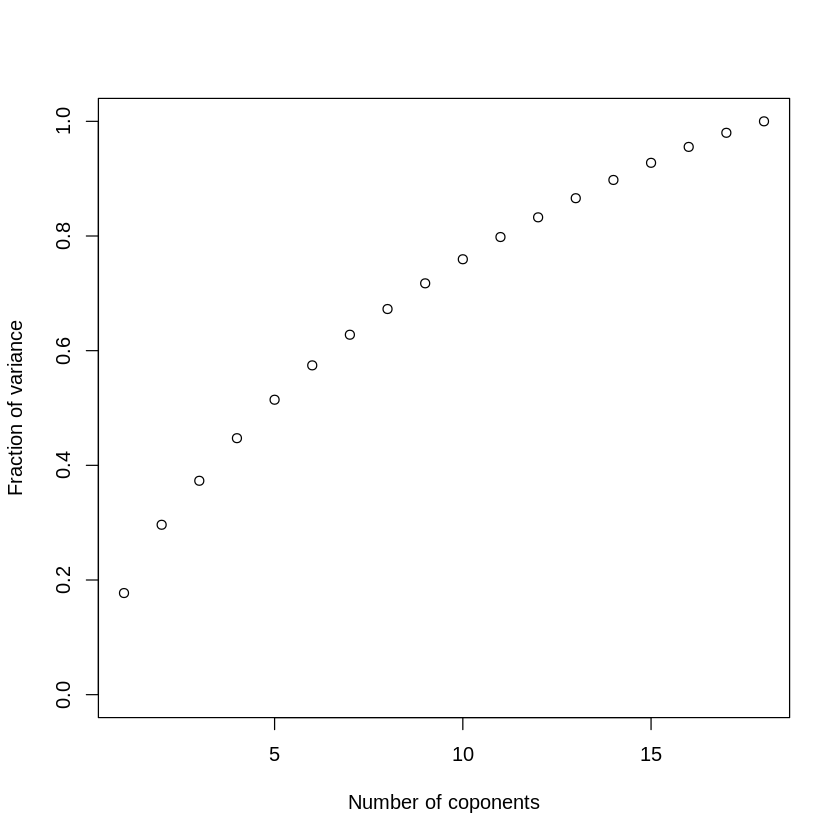

In [14]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [15]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [16]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Attitude,12,0.47
EnergyC,11,0.43
ConvB1,2,0.35
SqftCate,6,0.34
MC,15,0.32
OwnRent,5,0.29
SubNorm,16,0.25
HabitG,17,0.24
Income,9,0.23
HouseholdS,7,0.20
PBC,13,0.19


In [17]:
#Age, Gender, OwnRent, SqftCate, Income, Educ, EnergyC, MC, ConvB1, HabitG, Attitude, PBC, SubNorm
IndepPred = c("Age","SqftCate","OwnRent","Income","Educ","MC","EnergyC","PBC","SubNorm","HabitG","Attitude")

fmla <- as.formula(paste("IncWD",paste(IndepPred,collapse="+"),sep="~"));

In [18]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.561 -1.255  0.218  1.415  3.429 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.877405   0.810819    6.02  4.1e-09 ***
Age          0.041161   0.008257    4.98  9.3e-07 ***
SqftCate     0.212353   0.095443    2.22    0.027 *  
OwnRent     -0.019820   0.195475   -0.10    0.919    
Income      -0.056585   0.051332   -1.10    0.271    
Educ        -0.047209   0.082253   -0.57    0.566    
MC          -0.115030   0.093847   -1.23    0.221    
EnergyC      0.014849   0.074816    0.20    0.843    
PBC          0.033264   0.098947    0.34    0.737    
SubNorm     -0.056505   0.070091   -0.81    0.421    
HabitG       0.000206   0.080621    0.00    0.998    
Attitude    -0.189830   0.100668   -1.89    0.060 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 400 degrees of freedom
Multiple R-squared:  0.109,	Adjusted

In [19]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,8.6e+01,86.1251,28.8438,1.3e-07
SqftCate,1,1.5e+01,14.8211,4.9636,2.6e-02
OwnRent,1,9.7e-01,0.9654,0.3233,5.7e-01
Income,1,4.2e+00,4.2154,1.4118,2.4e-01
Educ,1,3.5e+00,3.5020,1.1728,2.8e-01
MC,1,1.7e+01,17.3668,5.8162,1.6e-02
EnergyC,1,4.8e+00,4.8165,1.6131,2.0e-01
PBC,1,3.3e-03,0.0033,0.0011,9.7e-01
SubNorm,1,3.2e+00,3.1938,1.0696,3.0e-01
HabitG,1,1.2e-02,0.0124,0.0042,9.5e-01


In [20]:
library(car)
vif(mod)

Age SqftCate  OwnRent   Income     Educ       MC  EnergyC      PBC 
     1.2      1.4      1.4      1.3      1.1      1.4      1.7      1.1 
 SubNorm   HabitG Attitude 
     1.3      1.2      1.8

In [21]:
#added CashYN to model
IndepPred = c("Age","SqftCate","OwnRent","Income","Educ","EnergyC","MC","PBC","SubNorm","HabitG","Attitude","CashYN")

fmla <- as.formula(paste("IncWD",paste(IndepPred,collapse="+"),sep="~"));

In [22]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-4.605 -1.272  0.222  1.405  3.415 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.49e+00   8.46e-01    5.31  1.9e-07 ***
Age          4.05e-02   8.25e-03    4.91  1.3e-06 ***
SqftCate     2.17e-01   9.53e-02    2.28    0.023 *  
OwnRent      1.10e-02   1.96e-01    0.06    0.955    
Income      -6.11e-02   5.13e-02   -1.19    0.235    
Educ        -5.10e-02   8.21e-02   -0.62    0.535    
EnergyC      1.63e-02   7.47e-02    0.22    0.827    
MC          -1.21e-01   9.38e-02   -1.29    0.197    
PBC          3.48e-02   9.88e-02    0.35    0.725    
SubNorm     -5.50e-02   7.00e-02   -0.79    0.432    
HabitG       4.98e-05   8.05e-02    0.00    1.000    
Attitude    -2.01e-01   1.01e-01   -2.00    0.047 *  
CashYNTRUE   5.08e-01   3.22e-01    1.58    0.115    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 399 d

In [23]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,8.6e+01,86.1251,28.9512,1.3e-07
SqftCate,1,1.5e+01,14.8211,4.9821,2.6e-02
OwnRent,1,9.7e-01,0.9654,0.3245,5.7e-01
Income,1,4.2e+00,4.2154,1.4170,2.3e-01
Educ,1,3.5e+00,3.5020,1.1772,2.8e-01
EnergyC,1,1.1e+01,10.6442,3.5781,5.9e-02
MC,1,1.2e+01,11.5391,3.8789,5.0e-02
PBC,1,3.3e-03,0.0033,0.0011,9.7e-01
SubNorm,1,3.2e+00,3.1938,1.0736,3.0e-01
HabitG,1,1.2e-02,0.0124,0.0042,9.5e-01
